In [131]:
import warnings
warnings.filterwarnings('ignore')



In [137]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'ACU'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

#     # plot ROC curve
#     fig = plt.figure(figsize=(6, 6))
#     plt.plot([0, 1], [0, 1], 'k--')
#     for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
#         fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
#         plt.plot(fpr, tpr, label=name_selected)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend(loc='lower right')
#     plt.show()

    f1_metric = f1_score(y_checked, predictions, average=None)
#     auc_metric = roc_auc_score(y_checked, predictions_proba[:,1], multi_class='ovr')
    acu = accuracy_score(y_checked, predictions)
    new_row = pd.DataFrame([{'Model': name, 'F1_score': f1_metric, 'ACU': acu}])
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)
    return metrics_dataframe

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import pandas as pd
diabetes = pd.read_csv('penguins.csv')
diabetes = diabetes[diabetes['BodyMass'].notna()]
# diabetes = diabetes[diabetes['Species']!=2]
diabetes

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [139]:
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

X, y = diabetes[features], diabetes[target]

X_train, X_test, y_train, y_test = train_test_split(X[['CulmenLength', 'BodyMass']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))



Treningowe obserwacje: 239
Testowe obserwacje: 103


In [140]:
from sklearn.preprocessing import StandardScaler
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

In [141]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train_standardized, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


              precision    recall  f1-score   support

           0       0.88      0.93      0.90        45
           1       0.97      0.89      0.93        37
           2       0.86      0.86      0.86        21

    accuracy                           0.90       103
   macro avg       0.90      0.89      0.90       103
weighted avg       0.91      0.90      0.90       103



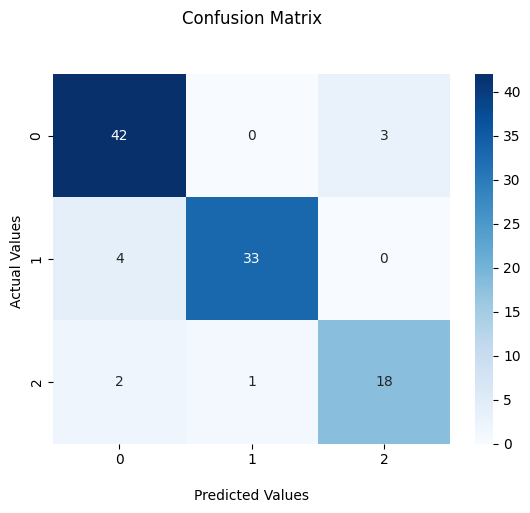

,Model,F1_score,ACU
0,KKN,"[0.9032258064516129, 0.9295774647887324, 0.857...",0.902913


In [142]:
calculate_metrics(model_knn, 'KKN', X_test_standardized, y_test)

In [145]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=1)
model_forest.fit(X_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       0.44      1.00      0.61        45
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        21

    accuracy                           0.44       103
   macro avg       0.15      0.33      0.20       103
weighted avg       0.19      0.44      0.27       103



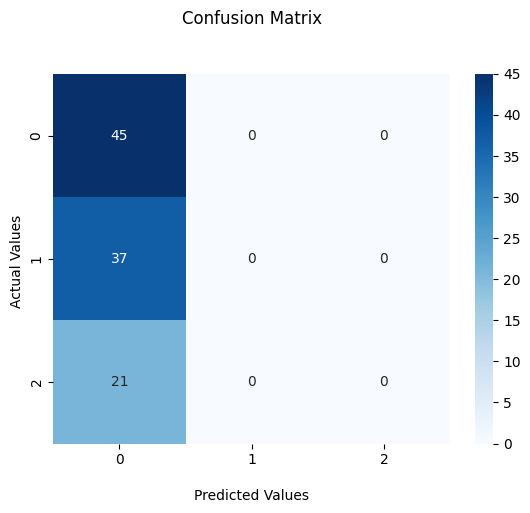

,Model,F1_score,ACU
0,KKN,"[0.9032258064516129, 0.9295774647887324, 0.857...",0.902913
1,Random Forest,"[0.6081081081081081, 0.0, 0.0]",0.436893


In [146]:
calculate_metrics(model_forest, 'Random Forest', X_test_standardized, y_test)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91        45
           1       0.91      0.86      0.89        37
           2       0.89      0.81      0.85        21

    accuracy                           0.89       103
   macro avg       0.90      0.88      0.88       103
weighted avg       0.89      0.89      0.89       103



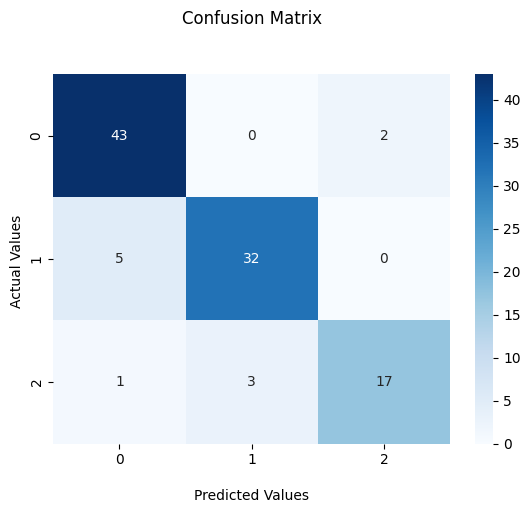

,Model,F1_score,ACU
0,KKN,"[0.9032258064516129, 0.9295774647887324, 0.857...",0.902913
1,Random Forest,"[0.6081081081081081, 0.0, 0.0]",0.436893
2,AdaBoost,"[0.9148936170212766, 0.8888888888888888, 0.85]",0.893204


In [148]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


model_adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_adaboost.fit(X_train, y_train)
calculate_metrics(model_adaboost, 'AdaBoost', X_test, y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.36      1.00      0.53        37
           2       0.00      0.00      0.00        21

    accuracy                           0.36       103
   macro avg       0.12      0.33      0.18       103
weighted avg       0.13      0.36      0.19       103



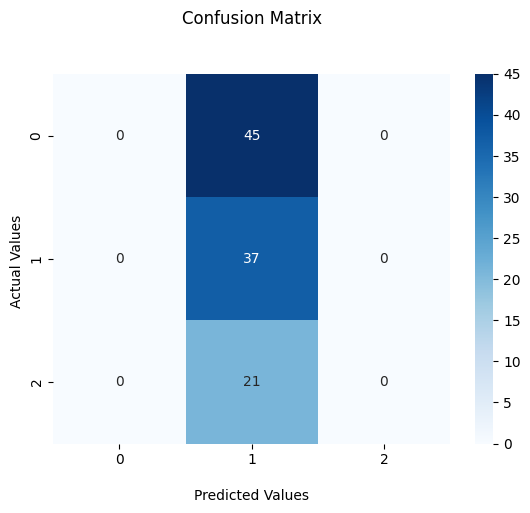

,Model,F1_score,ACU
0,KKN,"[0.9032258064516129, 0.9295774647887324, 0.857...",0.902913
1,Random Forest,"[0.6081081081081081, 0.0, 0.0]",0.436893
2,AdaBoost,"[0.9148936170212766, 0.8888888888888888, 0.85]",0.893204
3,SVM,"[0.0, 0.5285714285714286, 0.0]",0.359223


In [149]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_standardized, y_train)
calculate_metrics(model_svm, 'SVM', X_test, y_test)